# Summarize categorical variables


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
amex = pd.read_excel('data/listings.xlsx', sheetname='amex',na_values=['n/a'])

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
Stock Symbol             360 non-null object
Company Name             360 non-null object
Last Sale                346 non-null float64
Market Capitalization    360 non-null float64
IPO Year                 105 non-null float64
Sector                   238 non-null object
Industry                 238 non-null object
dtypes: float64(3), object(4)
memory usage: 19.8+ KB


### nunique() method to learn the unique categories

In [4]:
amex_unique = amex.Sector.nunique()
print(amex_unique)

12


In [5]:
# to get unique values of all columns
amex.apply(lambda x : x.nunique())

Stock Symbol             360
Company Name             326
Last Sale                323
Market Capitalization    317
IPO Year                  24
Sector                    12
Industry                  68
dtype: int64

In [6]:
# .value_counts() : count of each unique value
amex.Sector.value_counts()

Health Care              49
Basic Industries         44
Energy                   28
Consumer Services        27
Capital Goods            24
Technology               20
Consumer Non-Durables    13
Finance                  12
Public Utilities         11
Miscellaneous             5
Consumer Durables         4
Transportation            1
Name: Sector, dtype: int64

In [7]:
# how many IPOs per year ?
amex['IPO Year'].value_counts()

2002.0    19
2015.0    11
1999.0     9
1993.0     7
2014.0     6
2004.0     5
2013.0     5
2017.0     5
2003.0     5
1992.0     4
2005.0     3
2006.0     3
2016.0     3
1986.0     3
2011.0     3
2007.0     3
1997.0     2
1988.0     2
1998.0     2
2009.0     1
1991.0     1
1996.0     1
1990.0     1
1987.0     1
Name: IPO Year, dtype: int64

In [8]:
# convert IPO Year to int
ipo_by_yr = amex['IPO Year'].dropna().astype(int).value_counts()
ipo_by_yr

2002    19
2015    11
1999     9
1993     7
2014     6
2004     5
2003     5
2017     5
2013     5
1992     4
2006     3
2005     3
2007     3
2016     3
2011     3
1986     3
1998     2
1997     2
1988     2
2009     1
1996     1
1991     1
1990     1
1987     1
Name: IPO Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

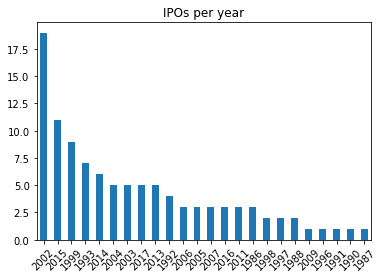

In [9]:
ipo_by_yr.plot(kind='bar', title='IPOs per year')
plt.xticks(rotation=45)

### compare the distribution of listings in the AMEX, NASDAQ, and NYSE per sector

In [14]:
listings.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


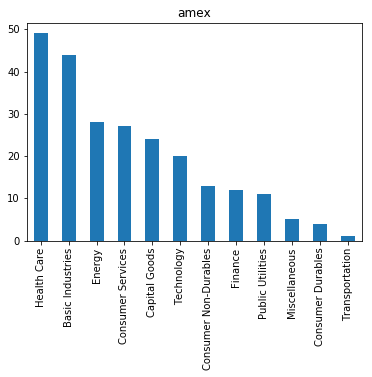

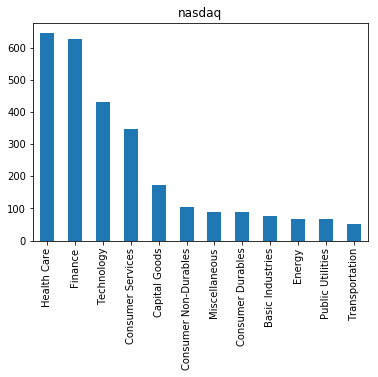

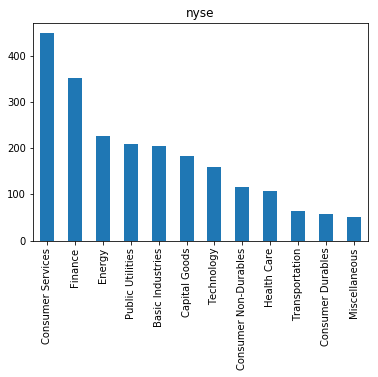

In [16]:
# Create the list exchanges
exchanges = ['amex','nasdaq','nyse']
listings = pd.read_excel('data/listings.xlsx',sheet_name=exchanges,na_values=['n/a'])


# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar', title=exchange)
    # Show the plot
    plt.show()

### combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector

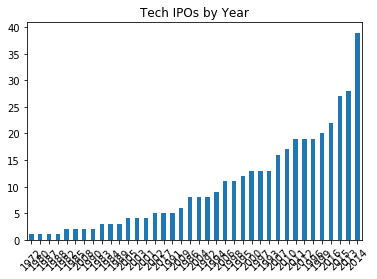

In [17]:
# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings[exchange])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(sort=True, ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()